# PCA, Dimensionality Reduction
### As name implies PCA (Prinicipal Component Analysis) is used to reduce dimensionality
### The idea is that retain most of the variability present in the data using a fraction of the data
### SVD is used to decompose a matrix into the left singular vector, the eigen values and the right singluarl values. The eigen values along the diagonal give a measure of the variance explained by the eigen vector and a running sum gives us an estimate of the total variance explained by k features
### When we select k features, it means we are projecting a n dimension vector space on to a k dimension vector space where all the k vectors are the principal components and ther running total as already mentioned above gives us the total amount of variance retained 
### We can use PCA from sklearn.decomposition to easily implement it

In [103]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [104]:
import pandas as pd

In [105]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [106]:
X = iris.data
y = iris.target

In [107]:
# for pca it is important to scale the data to have zero mean
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

In [108]:
from sklearn.decomposition import PCA

In [109]:
pca = PCA(n_components=2)


In [110]:
xsp = pca.fit_transform(X_scaled)

## PCA can be used to reduce a high dimensionality space to two dimensions to enable visualization

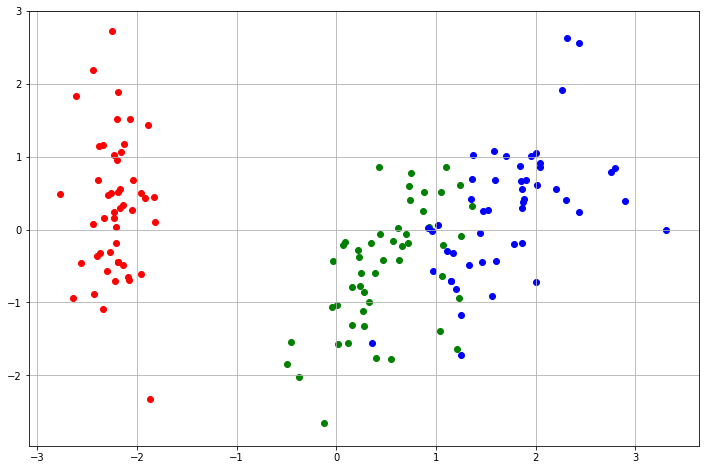

In [111]:
fig = plt.figure(figsize = (12, 8))
colors = ['r', 'g', 'b']
for x in enumerate(iris.target_names):
    plt.scatter(xsp[y==x[0],0], xsp[y == x[0], 1], color = colors[x[0]])
plt.grid()

In [112]:
pca.explained_variance_ratio_

array([ 0.72770452,  0.23030523])

In [113]:
pca.explained_variance_ratio_.sum()

0.95800975361481977

In [114]:
# we can dot multiply the pca transformed matrix with the pca components to get the original matrix construction back
X_inverse_pca = np.dot(xsp, pca.components_)

In [115]:
print(list(zip(X_scaled[:5], X_inverse_pca[:5])))

[(array([-0.90068117,  1.03205722, -1.3412724 , -1.31297673]), array([-0.99464948,  1.06443573, -1.30560624, -1.24776881])), (array([-1.14301691, -0.1249576 , -1.3412724 , -1.31297673]), array([-1.33390869, -0.05714369, -1.2265688 , -1.22297912])), (array([-1.38535265,  0.33784833, -1.39813811, -1.31297673]), array([-1.35552506,  0.32884265, -1.38309889, -1.36017238])), (array([-1.50652052,  0.10644536, -1.2844067 , -1.31297673]), array([-1.41786717,  0.07428633, -1.35146108, -1.3409175 ])), (array([-1.02184904,  1.26346019, -1.3412724 , -1.31297673]), array([-0.99660128,  1.25363164, -1.37425242, -1.30697852]))]


In [245]:
u, s, v = np.linalg.svd(X_scaled)

In [246]:
u.shape, s.shape, v.shape

((150, 150), (4,), (4, 4))

In [247]:
s

array([ 20.89551896,  11.75513248,   4.7013819 ,   1.75816839])

In [248]:
[np.sum(s[:i + 1])/s.sum() for i in range(n)]

[0.53427285049108109, 0.83483720354523616, 0.95504578570778664, 1.0]

## Examine the SVD breakdown to get the eigen values

In [271]:
# Lets  capture the dimensions of the iris data

(m, n) =X_scaled.shape

In [272]:
m, n

(150, 4)

In [273]:
CV = np.cov(X_scaled, rowvar=False) / (n-1)
CV

array([[ 0.33557047, -0.03670109,  0.29253495,  0.27448109],
       [-0.03670109,  0.33557047, -0.14111278, -0.11964567],
       [ 0.29253495, -0.14111278,  0.33557047,  0.32307285],
       [ 0.27448109, -0.11964567,  0.32307285,  0.33557047]])

In [274]:
# use svd to get the 
un, sn, vn = np.linalg.svd(np.cov(X_scaled, rowvar=False) / (n-1))

In [275]:
un.shape, sn.shape, vn.shape

((4, 4), (4,), (4, 4))

In [276]:
sn

array([ 0.97678459,  0.30913454,  0.04944741,  0.00691534])

In [277]:
sn_total = sn.sum()

In [278]:
sn_total

1.3422818791946316

In [279]:
var_in = [np.sum((sn[:i + 1]))/sn_total for i in range(n)]

In [280]:
var_in

[0.72770452093801352, 0.95800975361481977, 0.99484807319109358, 1.0]

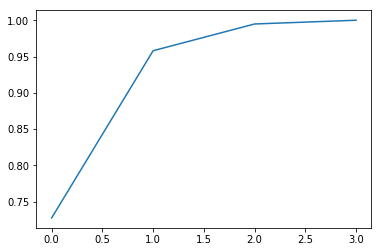

In [281]:
plt.plot(var_in)

In [282]:
eigvals, eigvects = np.linalg.eig(CV)

In [283]:
eigvals
print(eigvects)
print(un)
print(vn)

[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]
[[-0.52237162 -0.37231836  0.72101681  0.26199559]
 [ 0.26335492 -0.92555649 -0.24203288 -0.12413481]
 [-0.58125401 -0.02109478 -0.14089226 -0.80115427]
 [-0.56561105 -0.06541577 -0.6338014   0.52354627]]
[[-0.52237162  0.26335492 -0.58125401 -0.56561105]
 [-0.37231836 -0.92555649 -0.02109478 -0.06541577]
 [ 0.72101681 -0.24203288 -0.14089226 -0.6338014 ]
 [ 0.26199559 -0.12413481 -0.80115427  0.52354627]]


In [284]:
print(X_scaled.dot(un[:, :2])[:4])
print(xsp[:4])

[[ 2.26454173 -0.5057039 ]
 [ 2.0864255   0.65540473]
 [ 2.36795045  0.31847731]
 [ 2.30419716  0.57536771]]
[[-2.26454173  0.5057039 ]
 [-2.0864255  -0.65540473]
 [-2.36795045 -0.31847731]
 [-2.30419716 -0.57536771]]
